<a href="https://colab.research.google.com/github/Shambhavi-Gupta/DS_Data_Visualization_StackedBarPlot-Relative_Stacked_Barplot/blob/master/DS_Data_Visualization_StackedBarPlot_%26_Relative_Stacked_Barplot_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use(['dark_background'])
import seaborn as sns
sns.set(color_codes=True)

In [11]:
url = 'https://api.covid19india.org/states_daily.json'

In [12]:
import urllib.request

In [14]:
import json

In [15]:
url = 'https://api.covid19india.org/states_daily.json'
urllib.request.urlretrieve(url ,'data.json')

with open('data.json') as f:
    data = json.load(f)
data = data['states_daily']
df= pd.json_normalize(data)    

In [16]:
df.tail()

,an,ap,ar,as,br,ch,ct,date,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,status,tg,tn,tr,tt,un,up,ut,wb
367,20,1003,8,757,655,23,73,14-Jul-20,0,1924,33,67,749,11,453,77,128,1142,181,0,0,4500,0,50,367,8,6,609,77,44,539,-1,Recovered,1161,4743,63,20977,0,778,11,718
368,0,43,0,6,9,2,1,14-Jul-20,0,35,0,1,14,0,4,3,8,87,1,0,0,213,0,0,10,0,0,5,9,0,6,0,Deceased,10,67,0,587,0,28,1,24
369,5,2432,29,1088,1320,19,177,15-Jul-20,0,1647,17,198,925,32,678,337,493,3176,623,14,0,7975,19,28,638,0,6,618,288,65,866,11,Confirmed,1597,4496,98,32607,-655,1659,99,1589
370,1,911,0,715,514,13,49,15-Jul-20,0,2463,28,67,791,28,577,57,114,1076,196,18,0,3606,0,60,333,0,2,612,204,60,333,1,Recovered,1159,5000,66,20646,0,762,81,749
371,0,44,0,2,14,1,0,15-Jul-20,0,41,1,0,10,0,7,2,11,87,1,0,0,233,0,0,9,0,0,5,8,3,6,0,Deceased,11,68,1,614,0,29,0,20


## Stacked Barplot

In [17]:
df_ = df.tail(3)
df_.drop('date', axis=1, inplace=True)
df_.set_index('status', inplace=True)
df_ = df_.T
df_ = df_.apply(pd.to_numeric)
df_.drop('tt', inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
df_.head()

status,Confirmed,Recovered,Deceased
an,5,1,0
ap,2432,911,44
ar,29,0,0
as,1088,715,2
br,1320,514,14


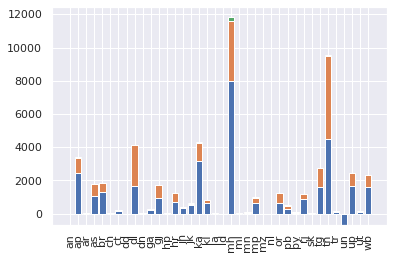

In [19]:
plt.bar(df_.index ,df_.Confirmed);
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed)
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed + df_.Recovered)
plt.xticks(rotation=90);

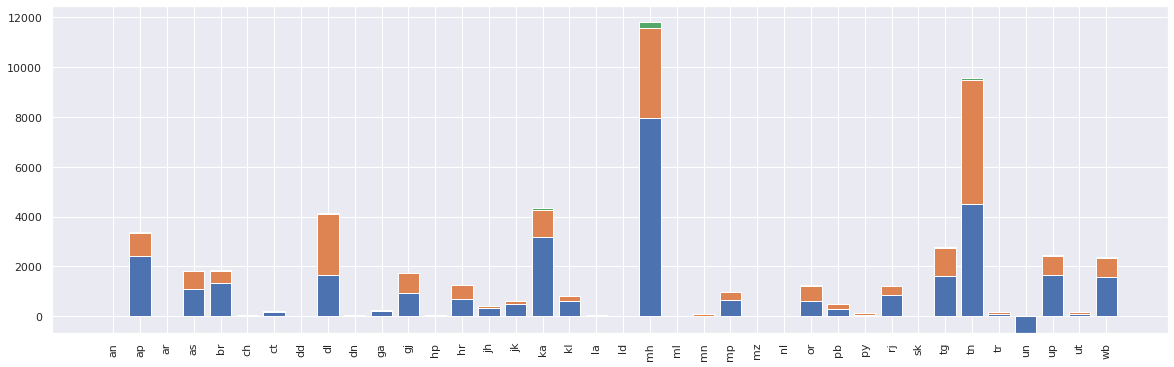

In [20]:
fig = plt.gcf();
fig.set_size_inches(20, 6);
plt.bar(df_.index ,df_.Confirmed);
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed)
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed + df_.Recovered)
plt.xticks(rotation=90);

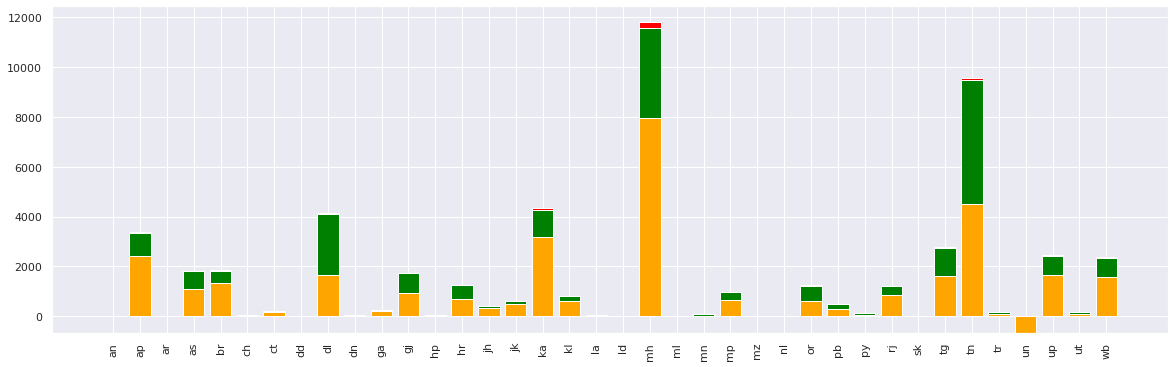

In [21]:
fig = plt.gcf();
fig.set_size_inches(20, 6);
plt.bar(df_.index ,df_.Confirmed, color = 'Orange');
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed, color = 'Green')
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed + df_.Recovered, color = 'Red')
plt.xticks(rotation=90);

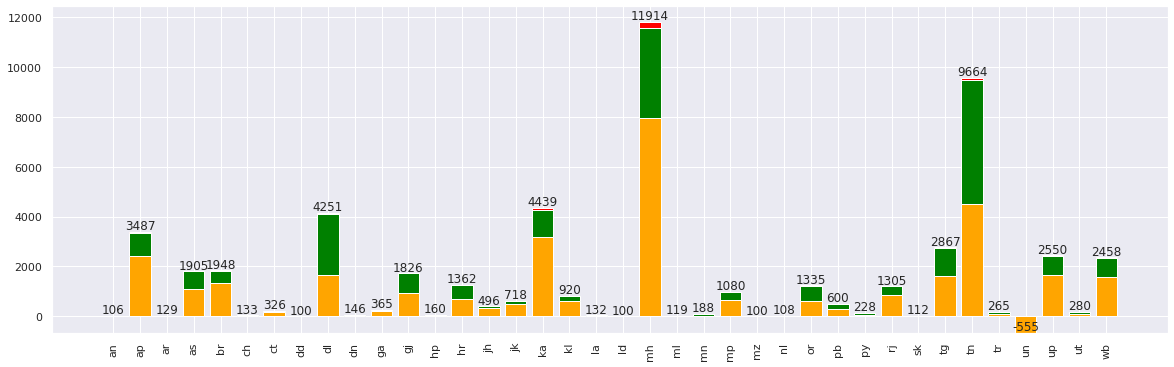

In [22]:
fig = plt.gcf();
fig.set_size_inches(20, 6);
plt.bar(df_.index ,df_.Confirmed, color = 'Orange');
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed, color = 'Green')
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed + df_.Recovered, color = 'Red')
plt.xticks(rotation=90);

for i, val in enumerate(df_.index):
    y = df_.loc[val].sum() + 100
    x = i
    plt.text(x, y, str(y), ha='center');

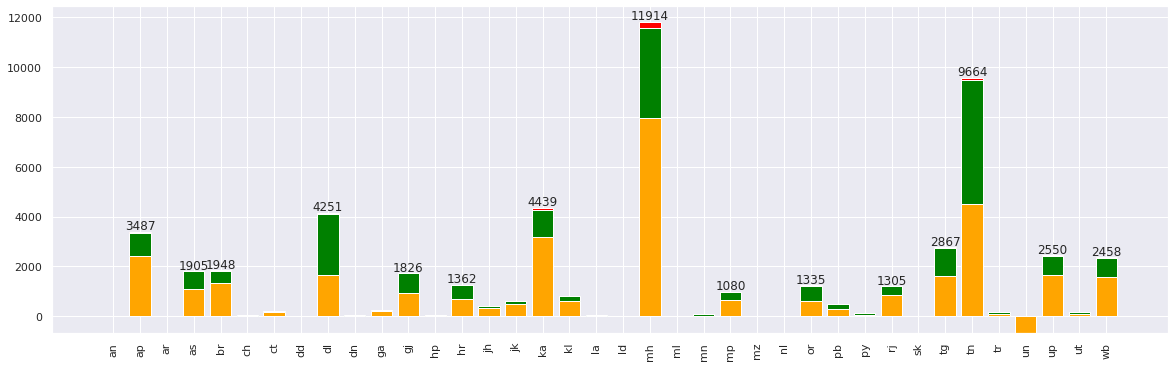

In [23]:
fig = plt.gcf();
fig.set_size_inches(20, 6);
plt.bar(df_.index ,df_.Confirmed, color = 'Orange');
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed, color = 'Green')
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed + df_.Recovered, color = 'Red')
plt.xticks(rotation=90);

for i, val in enumerate(df_.index):
    y = df_.loc[val].sum() + 100
    if y > 1000:
        x = i
        plt.text(x, y, str(y), ha='center');

## Relative Stacked Barplot

In [24]:
df_.head()

status,Confirmed,Recovered,Deceased
an,5,1,0
ap,2432,911,44
ar,29,0,0
as,1088,715,2
br,1320,514,14


In [25]:
df_['Total'] = 0

In [26]:
df_['Total'] = df_.sum(axis =1)

In [27]:
df_.head()

status,Confirmed,Recovered,Deceased,Total
an,5,1,0,6
ap,2432,911,44,3387
ar,29,0,0,29
as,1088,715,2,1805
br,1320,514,14,1848


In [30]:
df_['ConfirmedFraction'] = df_['Confirmed'] / df_['Total']
df_['RecoveredFraction'] = df_['Recovered'] / df_['Total']
df_['DeceasedFraction'] = df_['Deceased'] / df_['Total']

In [31]:
df_.head()

status,Confirmed,Recovered,Deceased,Total,ConfirmedFraction,RecoveredFraction,DeceasedFraction
an,5,1,0,6,0.833333,0.166667,0.000000
ap,2432,911,44,3387,0.718040,0.268970,0.012991
ar,29,0,0,29,1.000000,0.000000,0.000000
as,1088,715,2,1805,0.602770,0.396122,0.001108
br,1320,514,14,1848,0.714286,0.278139,0.007576


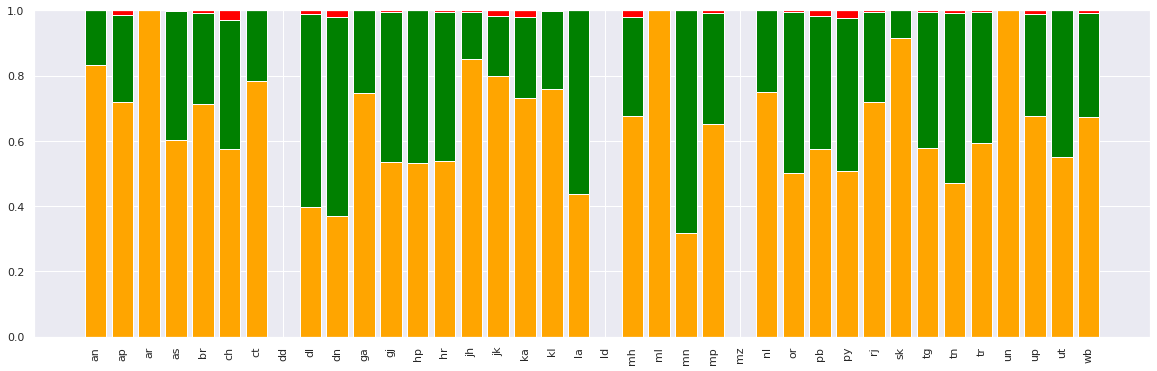

In [32]:
fig = plt.gcf();
fig.set_size_inches(20, 6);
plt.bar(df_.index ,df_.ConfirmedFraction, color = 'Orange');
plt.bar(df_.index, df_.RecoveredFraction, bottom=df_.ConfirmedFraction, color = 'Green')
plt.bar(df_.index, df_.DeceasedFraction, bottom=df_.ConfirmedFraction + df_.RecoveredFraction, color = 'Red')
plt.xticks(rotation=90);

In [33]:
df_ = df_.sort_values('ConfirmedFraction' , ascending=False)

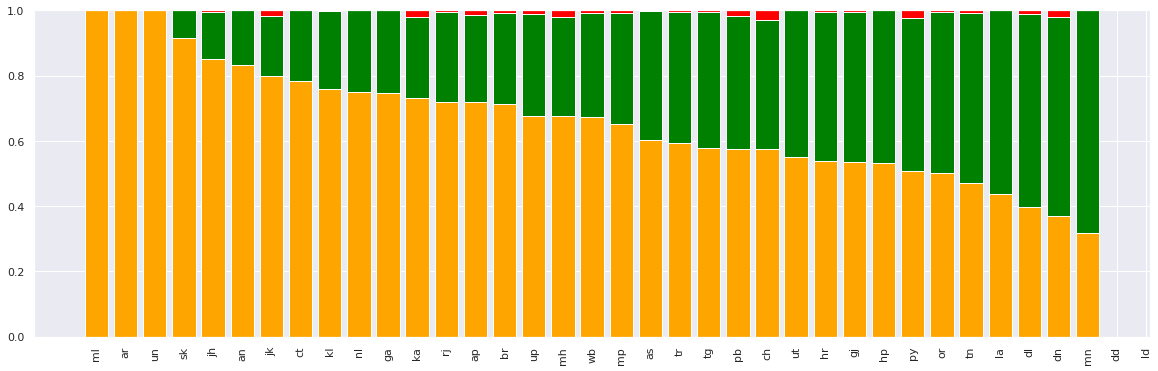

In [34]:
fig = plt.gcf();
fig.set_size_inches(20, 6);
plt.bar(df_.index ,df_.ConfirmedFraction, color = 'Orange');
plt.bar(df_.index, df_.RecoveredFraction, bottom=df_.ConfirmedFraction, color = 'Green')
plt.bar(df_.index, df_.DeceasedFraction, bottom=df_.ConfirmedFraction + df_.RecoveredFraction, color = 'Red')
plt.xticks(rotation=90);

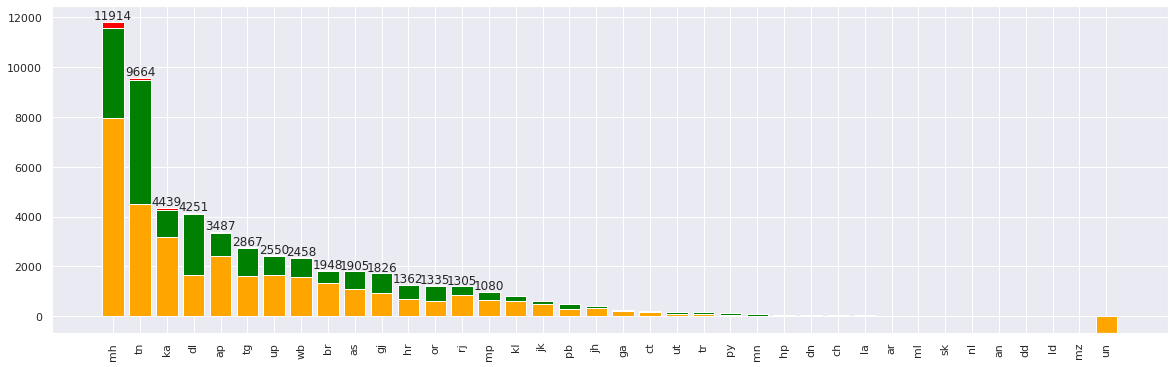

In [35]:
df_ = df_.sort_values('Total' , ascending = False)
fig = plt.gcf();
fig.set_size_inches(20, 6);
plt.bar(df_.index ,df_.Confirmed, color = 'Orange');
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed, color = 'Green')
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed + df_.Recovered, color = 'Red')
plt.xticks(rotation=90);

for i, val in enumerate(df_.index):
    y = df_.loc[val , 'Total'] + 100
    if y > 1000:
        x = i
        plt.text(x, y, str(y), ha='center');

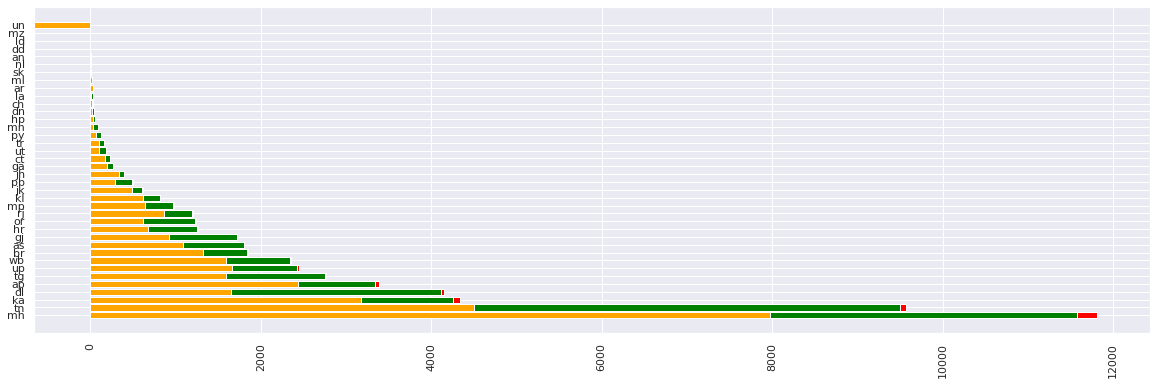

In [36]:
df_ = df_.sort_values('Total' , ascending = False)
fig = plt.gcf();
fig.set_size_inches(20, 6);
plt.barh(df_.index ,df_.Confirmed, color = 'Orange');
plt.barh(df_.index, df_.Recovered, left=df_.Confirmed, color = 'Green')
plt.barh(df_.index, df_.Deceased, left=df_.Confirmed + df_.Recovered, color = 'Red')
plt.xticks(rotation=90);
